In [1]:
import numpy as np
import tensorflow as tf

2023-06-07 15:37:27.097243: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers

In [3]:
#Load training and test data
(trainData, trainLabels), (testData, testLabels) = imdb.load_data(num_words = 10000)

#Transform test and training data to vectors for inputs
def vectorize(sequences, ndmin=10000):
    results = np.zeros((len(sequences), ndmin))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

#Input training data vectorized
xTrain = vectorize(trainData)
xTest = vectorize(testData)

#Test labels as scalars
yTrain = np.asarray(trainLabels).astype('float32')
yTest = np.asarray(testLabels).astype('float32')

#Test print to ensure working
print(len(xTrain))
xTrain[0]

25000


array([0., 1., 1., ..., 0., 0., 0.])

Epoch 1/20
30/30 [==============================] - 3s 86ms/step - loss: 0.5390 - acc: 0.7721 - val_loss: 0.4199 - val_acc: 0.8591
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3411 - acc: 0.8919 - val_loss: 0.3391 - val_acc: 0.8697
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2579 - acc: 0.9141 - val_loss: 0.3087 - val_acc: 0.8803
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2121 - acc: 0.9309 - val_loss: 0.2878 - val_acc: 0.8861
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1784 - acc: 0.9407 - val_loss: 0.2741 - val_acc: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1514 - acc: 0.9530 - val_loss: 0.2889 - val_acc: 0.8835
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1309 - acc: 0.9594 - val_loss: 0.2912 - val_acc: 0.8853
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1138 - a

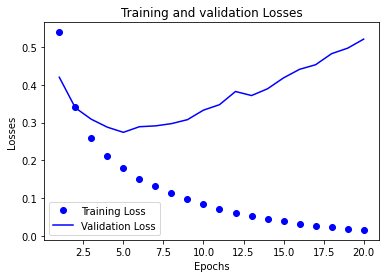

In [5]:
#Set up model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

xVal = xTrain[:10000]
partialX = xTrain[10000:]
yVal = yTrain[:10000]
partialY = yTrain[10000:]

history = model.fit(partialX, partialY, epochs = 20, batch_size = 512, validation_data = (xVal, yVal))

import matplotlib.pyplot as plt

history = history.history
history.keys()
losses = history['loss']
valLosses = history['val_loss']
acc = history['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, losses, 'bo', label='Training Loss')
plt.plot(epochs, valLosses, 'b', label='Validation Loss')
plt.title('Training and validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()
              

